## Importing Libraries

In [2]:
# !pip install https://github.com/podgorskiy/dnnlib/releases/download/0.0.1/dnnlib-0.0.1-py3-none-any.whl

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import dnnlib
# import torch_utils
from PIL import Image
import sys
import pickle

## Device

In [4]:
if torch.cuda.is_available():
    print("cuda")
else:
    print("cpu")

cuda


## Import pretrained model

In [5]:
!apt-get update
!apt-get install -y git

Hit:1 https://packages.cloud.google.com/apt gcsfuse-focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Get:4 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1581 B]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]    
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease    
Get:9 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [624 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1493 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [3592 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [32.5 k

In [6]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128
Receiving objects: 100% (131/131), 1.13 MiB | 7.98 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [7]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

--2024-04-05 11:29:03--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 52.84.18.79, 52.84.18.96, 52.84.18.33, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|52.84.18.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: 'ffhq.pkl'

ffhq.pkl            100%[===================>] 363.94M   230MB/s    in 1.6s    

2024-04-05 11:29:06 (230 MB/s) - 'ffhq.pkl' saved [381624121/381624121]



In [8]:
%cd /kaggle/working/stylegan2-ada-pytorch

/kaggle/working/stylegan2-ada-pytorch


# PART 1

In [30]:
# In this part, we shall use the pretrained version of StyleGAN used above to generate 10 random 
# images based on some seeds (0-9).

## Generating 10 realistic images using StyleGAN

In [9]:
!python generate.py --outdir=generated_images --trunc=1 --seeds=0-9 --network='/kaggle/working/ffhq.pkl'

Loading networks from "/kaggle/working/ffhq.pkl"...
Generating image for seed 0 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1 (1/10) ...
Generating image for seed 2 (2/10) ...
Generating image for seed 3 (3/10) ...
Generating image for seed 4 (4/10) ...
Generating image for seed 5 (5/10) ...
Generating image for seed 6 (6/10) ...
Generating image for seed 7 (7/10) ...
Generating image for seed 8 (8/10) ...
Generating image for seed 9 (9/10) ...


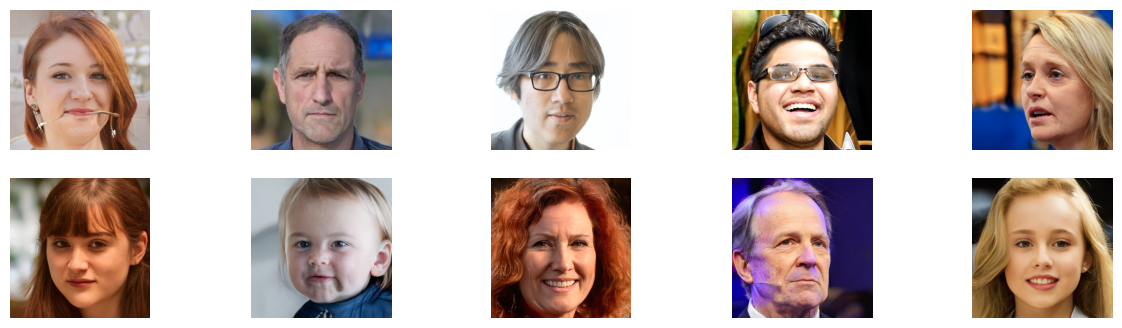

In [10]:
base_addr = '/kaggle/working/stylegan2-ada-pytorch/generated_images/seed000'
all_imgs = []

for i in range(0,10):
        addr = base_addr + (str(i)) + '.png'
        img = Image.open(addr)
        all_imgs.append(img)

fig, axes = plt.subplots(2, 5, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(all_imgs[i], cmap='gray')
    ax.axis('off')
plt.show()

# PART 2

## Running the pretrained model on self and friends' images

In [31]:
# In this section, we shall first run the pretrained model on the images of self and friends face 
# images and obtain the regenerated images from the projector.

In [11]:
!python projector.py --outdir=out1 --target='/kaggle/input/facedata/1.jpg' --network='/kaggle/working/ffhq.pkl' --save-video=False

Loading networks from "/kaggle/working/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.77 loss 24567.43
step    2/1000: dist 0.72 loss 27640.70
step    3/1000: dist 0.75 loss 27166.87
step    4/1000: dist 0.71 loss 26253.51
step    5/1000: dist 0.71 loss 24957.33
step    6/1000: dist 0.79 loss 23352.33
step    7/1000: dist 0.73 loss 21510.89
step    8/1000: dist 0.69 loss 19486.96
step    9/1000: dist 0.67 loss 17341.61
step   10/1000: dist 0.66 loss 15140.44
step   11/1000: dist 0.70 loss 12947.21
step   12/1000: dist 0.65 loss 10818.22
step   13/1000: dist 0.66 loss 8801.38
step   14/1000: dist 0.64 loss 6946.68
step   15/1000: dist 0.62 loss 5313.93
step   16/1000: dist 0.66 loss 3971.75
step   17/1000: dist 0.61 loss 2942.61
step   18/1000: dist 0.60 loss 2211.03
step   19/1000: dist 0.60 loss 1760.14
step   20/1000: dist 0.57 loss 15

In [12]:
!python projector.py --outdir=out2 --target='/kaggle/input/facedata/2.jpg' --network='/kaggle/working/ffhq.pkl' --save-video=False

Loading networks from "/kaggle/working/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.68 loss 24567.35
step    2/1000: dist 0.68 loss 27640.66
step    3/1000: dist 0.67 loss 27166.79
step    4/1000: dist 0.65 loss 26253.44
step    5/1000: dist 0.66 loss 24957.27
step    6/1000: dist 0.72 loss 23352.25
step    7/1000: dist 0.66 loss 21510.81
step    8/1000: dist 0.61 loss 19486.88
step    9/1000: dist 0.64 loss 17341.58
step   10/1000: dist 0.63 loss 15140.41
step   11/1000: dist 0.64 loss 12947.15
step   12/1000: dist 0.65 loss 10818.22
step   13/1000: dist 0.65 loss 8801.36
step   14/1000: dist 0.62 loss 6946.66
step   15/1000: dist 0.66 loss 5313.96
step   16/1000: dist 0.61 loss 3971.70
step   17/1000: dist 0.64 loss 2942.64
step   18/1000: dist 0.61 loss 2211.04
step   19/1000: dist 0.60 loss 1760.14
step   20/1000: dist 0.58 loss 15

In [13]:
!python projector.py --outdir=out3 --target='/kaggle/input/facedata/3.jpg' --network='/kaggle/working/ffhq.pkl' --save-video=False

Loading networks from "/kaggle/working/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.66 loss 24567.32
step    2/1000: dist 0.64 loss 27640.62
step    3/1000: dist 0.61 loss 27166.73
step    4/1000: dist 0.65 loss 26253.45
step    5/1000: dist 0.69 loss 24957.30
step    6/1000: dist 0.66 loss 23352.20
step    7/1000: dist 0.69 loss 21510.85
step    8/1000: dist 0.62 loss 19486.89
step    9/1000: dist 0.65 loss 17341.59
step   10/1000: dist 0.63 loss 15140.42
step   11/1000: dist 0.63 loss 12947.14
step   12/1000: dist 0.60 loss 10818.17
step   13/1000: dist 0.59 loss 8801.30
step   14/1000: dist 0.59 loss 6946.62
step   15/1000: dist 0.59 loss 5313.90
step   16/1000: dist 0.59 loss 3971.68
step   17/1000: dist 0.62 loss 2942.62
step   18/1000: dist 0.58 loss 2211.02
step   19/1000: dist 0.58 loss 1760.12
step   20/1000: dist 0.63 loss 15

In [14]:
!python projector.py --outdir=out4 --target='/kaggle/input/facedata/4.jpg' --network='/kaggle/working/ffhq.pkl' --save-video=False

Loading networks from "/kaggle/working/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.72 loss 24567.38
step    2/1000: dist 0.72 loss 27640.70
step    3/1000: dist 0.68 loss 27166.80
step    4/1000: dist 0.77 loss 26253.57
step    5/1000: dist 0.78 loss 24957.39
step    6/1000: dist 0.73 loss 23352.27
step    7/1000: dist 0.73 loss 21510.88
step    8/1000: dist 0.68 loss 19486.96
step    9/1000: dist 0.69 loss 17341.63
step   10/1000: dist 0.69 loss 15140.47
step   11/1000: dist 0.69 loss 12947.20
step   12/1000: dist 0.69 loss 10818.26
step   13/1000: dist 0.72 loss 8801.43
step   14/1000: dist 0.73 loss 6946.77
step   15/1000: dist 0.69 loss 5314.00
step   16/1000: dist 0.70 loss 3971.79
step   17/1000: dist 0.70 loss 2942.71
step   18/1000: dist 0.67 loss 2211.11
step   19/1000: dist 0.71 loss 1760.25
step   20/1000: dist 0.69 loss 15

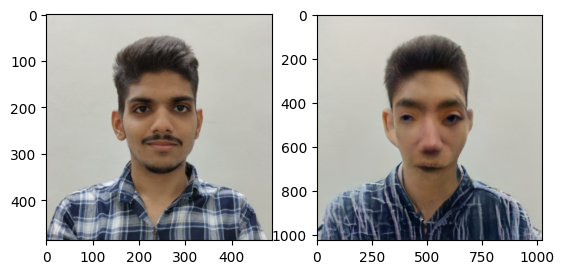

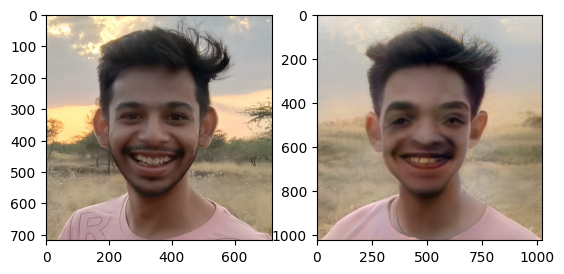

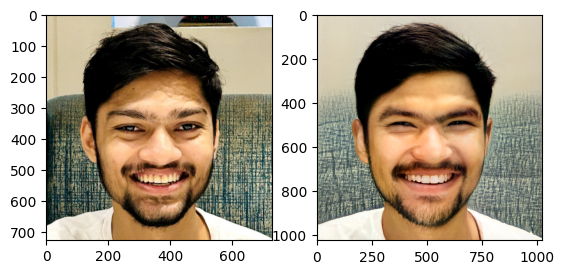

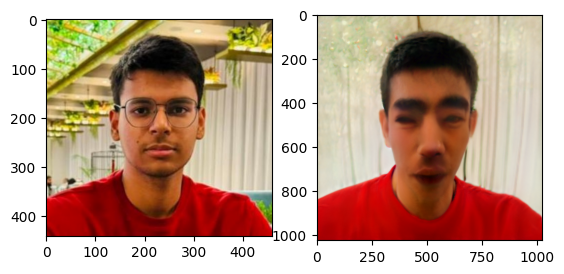

In [15]:
#  Here we shall compare the transformed/regenerated images with the original seed images

for i in range(1,5):
    
    fig, (ax1,ax2) = plt.subplots(1,2)

    gen_loc = '/kaggle/working/stylegan2-ada-pytorch/out' + str(i) + '/proj.png'
    gen_img = Image.open(gen_loc)

    orig_loc = '/kaggle/input/facedata/' + str(i) + '.jpg'
    orig_img = Image.open(orig_loc)

    ax1.imshow(orig_img)
    ax2.imshow(gen_img)
    plt.show()

## Generating latent vectors for face images

In [16]:
# We shall consider two source images and get their latent vectors from the pretrained GAN 

source_1 = '/kaggle/input/facedata/1.jpg'
source_2 = '/kaggle/input/facedata/3.jpg'

src_img1 = Image.open(source_1)
src_img2 = Image.open(source_2)

In [17]:
!python projector.py --outdir=latent_dir --target='/kaggle/input/facedata/1.jpg' --network='/kaggle/working/ffhq.pkl' --save-video=False

Loading networks from "/kaggle/working/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.77 loss 24567.43
step    2/1000: dist 0.72 loss 27640.70
step    3/1000: dist 0.75 loss 27166.87
step    4/1000: dist 0.71 loss 26253.51
step    5/1000: dist 0.71 loss 24957.33
step    6/1000: dist 0.79 loss 23352.33
step    7/1000: dist 0.73 loss 21510.88
step    8/1000: dist 0.69 loss 19486.96
step    9/1000: dist 0.67 loss 17341.61
step   10/1000: dist 0.66 loss 15140.44
step   11/1000: dist 0.70 loss 12947.21
step   12/1000: dist 0.65 loss 10818.22
step   13/1000: dist 0.67 loss 8801.38
step   14/1000: dist 0.64 loss 6946.68
step   15/1000: dist 0.62 loss 5313.93
step   16/1000: dist 0.66 loss 3971.75
step   17/1000: dist 0.61 loss 2942.62
step   18/1000: dist 0.60 loss 2211.03
step   19/1000: dist 0.60 loss 1760.14
step   20/1000: dist 0.57 loss 15

In [18]:
!python projector.py --outdir=latent_dir2 --target='/kaggle/input/facedata/2.jpg' --network='/kaggle/working/ffhq.pkl' --save-video=False

Loading networks from "/kaggle/working/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.68 loss 24567.35
step    2/1000: dist 0.68 loss 27640.66
step    3/1000: dist 0.67 loss 27166.79
step    4/1000: dist 0.65 loss 26253.44
step    5/1000: dist 0.66 loss 24957.27
step    6/1000: dist 0.71 loss 23352.25
step    7/1000: dist 0.66 loss 21510.81
step    8/1000: dist 0.61 loss 19486.88
step    9/1000: dist 0.64 loss 17341.57
step   10/1000: dist 0.63 loss 15140.42
step   11/1000: dist 0.64 loss 12947.15
step   12/1000: dist 0.65 loss 10818.22
step   13/1000: dist 0.65 loss 8801.36
step   14/1000: dist 0.62 loss 6946.66
step   15/1000: dist 0.65 loss 5313.96
step   16/1000: dist 0.62 loss 3971.71
step   17/1000: dist 0.65 loss 2942.65
step   18/1000: dist 0.61 loss 2211.04
step   19/1000: dist 0.62 loss 1760.16
step   20/1000: dist 0.58 loss 15

In [19]:
!python projector.py --outdir=latent_dir3 --target='/kaggle/input/facedata/3.jpg' --network='/kaggle/working/ffhq.pkl' --save-video=False

Loading networks from "/kaggle/working/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.66 loss 24567.32
step    2/1000: dist 0.64 loss 27640.62
step    3/1000: dist 0.61 loss 27166.73
step    4/1000: dist 0.65 loss 26253.45
step    5/1000: dist 0.69 loss 24957.30
step    6/1000: dist 0.66 loss 23352.20
step    7/1000: dist 0.69 loss 21510.85
step    8/1000: dist 0.62 loss 19486.89
step    9/1000: dist 0.64 loss 17341.58
step   10/1000: dist 0.63 loss 15140.41
step   11/1000: dist 0.63 loss 12947.14
step   12/1000: dist 0.60 loss 10818.17
step   13/1000: dist 0.60 loss 8801.31
step   14/1000: dist 0.59 loss 6946.63
step   15/1000: dist 0.59 loss 5313.89
step   16/1000: dist 0.59 loss 3971.68
step   17/1000: dist 0.62 loss 2942.62
step   18/1000: dist 0.59 loss 2211.02
step   19/1000: dist 0.57 loss 1760.12
step   20/1000: dist 0.63 loss 15

In [20]:
!python projector.py --outdir=latent_dir4 --target='/kaggle/input/facedata/4.jpg' --network='/kaggle/working/ffhq.pkl' --save-video=False

Loading networks from "/kaggle/working/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.72 loss 24567.38
step    2/1000: dist 0.72 loss 27640.70
step    3/1000: dist 0.68 loss 27166.80
step    4/1000: dist 0.77 loss 26253.57
step    5/1000: dist 0.78 loss 24957.39
step    6/1000: dist 0.73 loss 23352.27
step    7/1000: dist 0.73 loss 21510.88
step    8/1000: dist 0.68 loss 19486.96
step    9/1000: dist 0.69 loss 17341.63
step   10/1000: dist 0.69 loss 15140.47
step   11/1000: dist 0.69 loss 12947.20
step   12/1000: dist 0.69 loss 10818.26
step   13/1000: dist 0.72 loss 8801.43
step   14/1000: dist 0.73 loss 6946.77
step   15/1000: dist 0.69 loss 5314.00
step   16/1000: dist 0.70 loss 3971.79
step   17/1000: dist 0.70 loss 2942.71
step   18/1000: dist 0.67 loss 2211.10
step   19/1000: dist 0.71 loss 1760.25
step   20/1000: dist 0.69 loss 15

## Linear Interpolation between Latent Vectors

In [21]:
# We have the latent representations of all 4 images.
# To perform linear interpolation between any 2 of them, we shall take a linear combination/ a weighted 
# sum of the latents and then generate the output image from the resultant latent.

latent1 = np.load('/kaggle/working/stylegan2-ada-pytorch/latent_dir/projected_w.npz')['w']
latent2 = np.load('/kaggle/working/stylegan2-ada-pytorch/latent_dir2/projected_w.npz')['w']
latent3 = np.load('/kaggle/working/stylegan2-ada-pytorch/latent_dir3/projected_w.npz')['w']
latent4 = np.load('/kaggle/working/stylegan2-ada-pytorch/latent_dir4/projected_w.npz')['w']

### Between latent 2 and latent 3

Loading networks from "/kaggle/working/ffhq.pkl"...
Generating images from projected W "/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz"
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Loading networks from "/kaggle/working/ffhq.pkl"...
Generating images from projected W "/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz"
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Loading networks from "/kaggle/working/ffhq.pkl"...
Generating images from projected W "/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz"
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Loading networks from "/kaggle/working/ffhq.pkl"...
Generating images from projected W "/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz"
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch

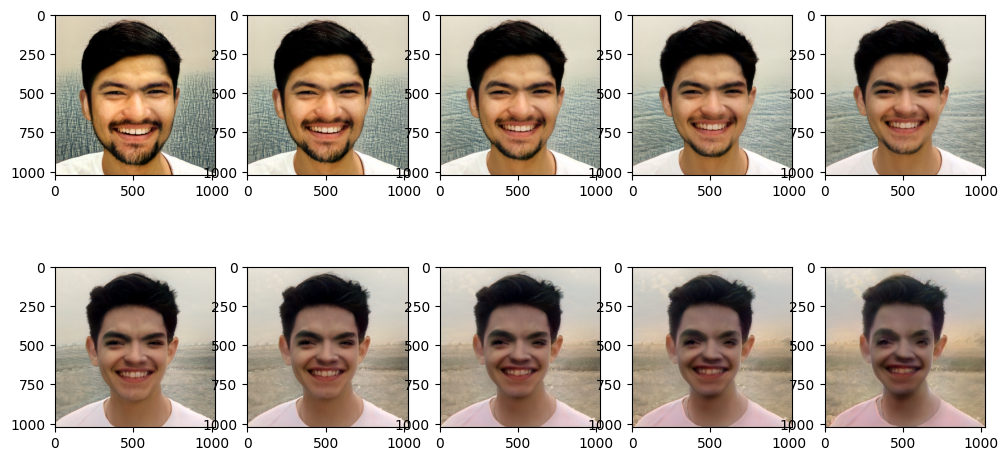

In [26]:
# We shall vary the amount of interpolation between images using the factor e

e_values = [0,0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,1]
interpolated_latents = []
interpolated_images = []

fig, ax = plt.subplots(2, 5, figsize=(12, 6))

e = e_values[0]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0][0].imshow(img)

e = e_values[1]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0][1].imshow(img)

e = e_values[2]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0][2].imshow(img)

e = e_values[3]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0,3].imshow(img)

e = e_values[4]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0][4].imshow(img)

e = e_values[5]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][0].imshow(img)

e = e_values[6]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][1].imshow(img)

e = e_values[7]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][2].imshow(img)

e = e_values[8]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][3].imshow(img)

e = e_values[9]
interpolation = e*latent2 + (1-e)*latent3
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][4].imshow(img)

plt.show()

### Between latent 2 and latent 4

Loading networks from "/kaggle/working/ffhq.pkl"...
Generating images from projected W "/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz"
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Loading networks from "/kaggle/working/ffhq.pkl"...
Generating images from projected W "/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz"
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Loading networks from "/kaggle/working/ffhq.pkl"...
Generating images from projected W "/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz"
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Loading networks from "/kaggle/working/ffhq.pkl"...
Generating images from projected W "/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz"
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch

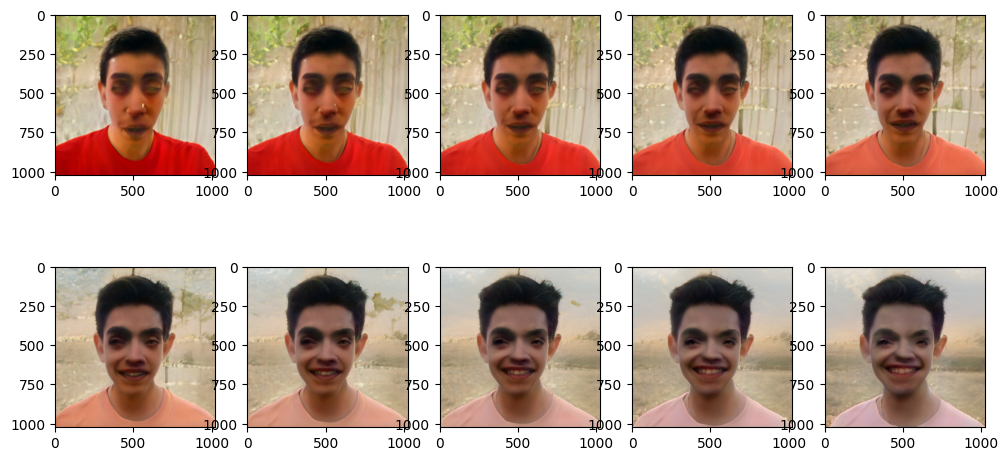

In [27]:
# We shall vary the amount of interpolation between images using the factor e 

e_values = [0,0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,1]
interpolated_latents = []
interpolated_images = []

fig, ax = plt.subplots(2, 5, figsize=(12, 6))

e = e_values[0]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0][0].imshow(img)

e = e_values[1]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0][1].imshow(img)

e = e_values[2]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0][2].imshow(img)

e = e_values[3]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0,3].imshow(img)

e = e_values[4]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[0][4].imshow(img)

e = e_values[5]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][0].imshow(img)

e = e_values[6]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][1].imshow(img)

e = e_values[7]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][2].imshow(img)

e = e_values[8]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][3].imshow(img)

e = e_values[9]
interpolation = e*latent2 + (1-e)*latent4
np.savez('/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz',w=interpolation)
!python generate.py --outdir=interpolated_images --projected-w='/kaggle/working/stylegan2-ada-pytorch/interpolated_latents.npz' --network='/kaggle/working/ffhq.pkl'
img = Image.open('/kaggle/working/stylegan2-ada-pytorch/interpolated_images/proj00.png')
ax[1][4].imshow(img)

plt.show()